In [163]:
# Nicolas Kardous

# Problem Set 1, due September 3rd at 11:59pm 

This problem set is meant to help you familiarize yourself with Python and Pandas. This is meant to be a very gentle introduction -- if you find this problem set to be difficult, you might want to consider taking a more introductory course.

### Before You Start
For this problem set, you should download INF0251-PS1.ipynb from bCourses. Create a local copy of the notebook and rename it LASTNAME_FIRSTNAME-PS1.ipynb. Then edit your renamed file directly in your browser by typing:
```
jupyter notebook <name_of_downloaded_file>
```

Make sure the following libraries load correctly (hit Ctrl-Enter).


In [1]:
#IPython is what you are using now to run the notebook
import IPython
print("IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with Arrays
import numpy as np
print("Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print("SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print("Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
print("Maplotlib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__)

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print("Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

IPython version:       7.8.0 (need at least 1.0)
Numpy version:        1.17.2 (need at least 1.7.1)
SciPy version:         1.3.1 (need at least 0.12.0)
Pandas version:       0.25.1 (need at least 0.11.0)
Maplotlib version:     3.1.1 (need at least 1.2.1)
Scikit-Learn version: 0.21.3 (need at least 0.13.1)


### Working in a group?
List the names of other students with whom you worked on this problem set:
- *Person 1*
- *Person 2*
- ...

---

## Introduction to the assignment

For this assignment, you will be using the [Boston Housing Prices Data Set](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names).  Please read about the dataset carefully before continuing -- it is worth investing a few minutes up front otherwise you are likely to be hopelessly confused! Also, if you're new to analyzing data in Python, please make sure to read the relevant readings linked to on Canvas before beginning, otherwise you'll be stabbing in the dark.

Use the following commands to load the dataset:

In [61]:
from sklearn.datasets import load_boston
bdata = load_boston()

The following commands will provide some basic information about the shape of the data:

In [70]:
print(bdata.keys())
print(bdata.feature_names)
print(bdata.data.shape)
print(bdata.target.shape)

# uncomment the following if you want to see a lengthy description of the dataset
# print(bdata.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)


In [68]:
boston = pd.DataFrame(bdata.data)

In [69]:
boston.columns = bdata.feature_names[:]
print(boston.shape)

(506, 13)


---

## Part 1: Descriptive analysis

### 1.1: Explore the data

Let's dig into the data a bit to see what we're dealing with. The first thing to do is to make sure you understand how the data is organized, what the data types are, whether there is any missing data, and so forth. Get your bearings on your own, then answer the following questions.

 - 1.1.1: How many different variables are there in the dataset, and how many different observations?
 - 1.1.2: How many instances are classified as neighborhoods where the tract bounds the Charles River? 
 - 1.1.3: Show that dataset does not contain any missing values.
 - 1.1.4: Display the property tax rate in the 5 neighborhoods that have the highest median housing price.

In [73]:
# 1.1.1
boston.shape[0],boston.shape[1]
#1.1.2
len(boston[boston['CHAS']==1])
#1.1.3
boston.isna==True
#1.1.4
boston["MedianPrice"] = bdata.target
boston.sort_values(by=['MedianPrice'],ascending=False)["TAX"][0:5]

283    198.0
225    307.0
369    666.0
370    666.0
371    666.0
Name: TAX, dtype: float64

*Provide our answers below:*

 - 1.1.1: There are 13 different variables and 506 different observations
 - 1.1.2: There are 35 instances that are classified as neighborhoods where the tract bounds the Charles River
 - 1.1.3: The dataset does not contain any values because boston.isna==True came up to be False
 - 1.1.4: The property tax rate in the 5 neighborhoods that have the highest median housing price is 273, 391, 711, 711 and 391.

### 1.2: Answer some basic questions
 - 1.2.1: What is the median housing price in Boston's most expensive neighborhood?
 - 1.2.2: How many neighborhoods have, on average, less than 5 rooms per dwelling?
 - 1.2.3: What is the property tax rate in the most expensive neighborhood that is also adjacent to the Charles River?
 - 1.2.4: What is the crime rate in the neighborhood with the highest median housing price? 
 - 1.2.5: What is the crime rate in the neighborhood with the lowest median housing price?

In [78]:
#1.2.1
boston.sort_values(by=['MedianPrice'],ascending=False)
#1.2.2
len(boston[boston['RM']<5])
#1.2.3
boston[boston['CHAS']==1].sort_values(by=['MedianPrice'],ascending=False)["TAX"]
#1.2.4
boston.sort_values(by=['MedianPrice'],ascending=False)["CRIM"]
#1.2.5
boston.sort_values(by=['MedianPrice'],ascending=True)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MedianPrice
398,38.35180,0.0,18.10,0.0,0.693,5.453,100.0,1.4896,24.0,666.0,20.2,396.90,30.59,5.0
405,67.92080,0.0,18.10,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98,5.0
400,25.04610,0.0,18.10,0.0,0.693,5.987,100.0,1.5888,24.0,666.0,20.2,396.90,26.77,5.6
399,9.91655,0.0,18.10,0.0,0.693,5.852,77.8,1.5004,24.0,666.0,20.2,338.16,29.97,6.3
414,45.74610,0.0,18.10,0.0,0.693,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,2.01019,0.0,19.58,0.0,0.605,7.929,96.2,2.0459,5.0,403.0,14.7,369.30,3.70,50.0
195,0.01381,80.0,0.46,0.0,0.422,7.875,32.0,5.6484,4.0,255.0,14.4,394.23,2.97,50.0
283,0.01501,90.0,1.21,1.0,0.401,7.923,24.8,5.8850,1.0,198.0,13.6,395.52,3.16,50.0
225,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63,50.0


*Provide our answers below:*

 - 1.2.1: Median housing price in Boston's most expensive neighborhood is $50,000
 - 1.2.2: There are 15 neighborhoods that have on average less than 5 rooms per dwelling
 - 1.2.3: Property tax rate in the most. expensive neghborhood that is also adjacent to Charles River is 666.
 - 1.2.4: The crime rate in the neighborhood with the highest median housing price is 0.01501
 - 1.2.5:The crime rate in the neighborhood with the lowest median housing price is 38.35

### 1.3: Summary statistics

Create a clean, organized table that shows just the following information (no more, no less) for each variable in the dataset. Note that your table should have K rows (one for each variable) and 7 columns, ordered as below:
 - The name of the variable
 - The number of observations with non-missing values
 - The mean of the variable
 - The standard deviation of the variable
 - The minimum value of the variable
 - The median of the variable
 - The maximum value of the variable

In [112]:
summary_boston = pd.DataFrame()
summary_boston['name']=boston.columns
summary_boston['Non missing values'] = list(len(boston)-boston[boston.isna()==True].sum())
summary_boston['Mean']=list(boston.mean())
summary_boston['Standard Deviation']=list(boston.std())
summary_boston['Min']=list(boston.min())
summary_boston['Median']=list(boston.median())
summary_boston['Max']=list(boston.max())
summary_boston

,name,Non missing values,Mean,Standard Deviation,Min,Median,Max
0,CRIM,506.0,3.613524,8.601545,0.00632,0.25651,88.9762
1,ZN,506.0,11.363636,23.322453,0.00000,0.00000,100.0000
2,INDUS,506.0,11.136779,6.860353,0.46000,9.69000,27.7400
3,CHAS,506.0,0.069170,0.253994,0.00000,0.00000,1.0000
4,NOX,506.0,0.554695,0.115878,0.38500,0.53800,0.8710
5,RM,506.0,6.284634,0.702617,3.56100,6.20850,8.7800
6,AGE,506.0,68.574901,28.148861,2.90000,77.50000,100.0000
7,DIS,506.0,3.795043,2.105710,1.12960,3.20745,12.1265
8,RAD,506.0,9.549407,8.707259,1.00000,5.00000,24.0000
9,TAX,506.0,408.237154,168.537116,187.00000,330.00000,711.0000


### 1.4 Simple statistical tests

Using a t-test, compare the median house value in locations that are adjacent to the Charles River to locations that are not adjacent to the Charles River. Do you reject the null hypothesis that prices are equivalent?

In [116]:
from scipy.stats import ttest_ind

ttest_ind(boston[boston['CHAS']==1]['MedianPrice'], boston[boston['CHAS']==0]['MedianPrice'])

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

We get a p-value of 7.39e-05. Because our p-value is < 0.05, we reject the null hypothesis

---

## Part 2: Histograms and Scatterplots


### 2.1: Histogram of housing prices

Below you will find some very basic code to make a very basic histogram of median housing prices (the "target" variable) for your dataset.  Your first task is to make this graph look pretty by doing the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black borders from the bars


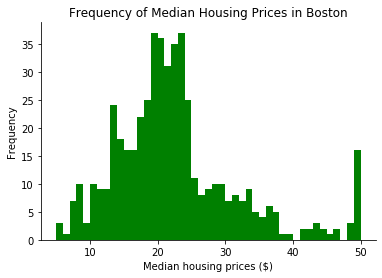

In [136]:
# prepare IPython to work with matplotlib and import the library to something convenient
# %matplotlib inline  
import matplotlib.pyplot as plt  

# edit the code below to make the graph look good
ax=plt.subplot()
plt.hist(bdata.target,bins=45,color='green',edgecolor='none')
plt.title("Frequency of Median Housing Prices in Boston")
plt.xlabel("Median housing prices ($)")
plt.ylabel("Frequency")

#matplotlib.rcParams["axes.spines.right"] = False
#matplotlib.rcParams["axes.spines.top"] = False

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


### 2.2: Scatter plot of housing prices and crime

Use matplotlib to create a scatter plot that shows the relationship between the median value of the home (y-axis) and the per-capita crime rate (x-axis).  Properly label your axes, and make sure that your graphic looks polished and professional.


Text(0, 0.5, 'Median value of home')

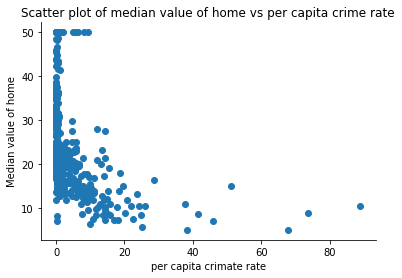

In [140]:
plt.scatter(boston["CRIM"],boston['MedianPrice'])
plt.title("Scatter plot of median value of home vs per capita crime rate")
plt.xlabel("per capita crimate rate")
plt.ylabel("Median value of home")

### 2.3: Interpret

What do you observe in the above scatter plot? Does there appear to be a relationship between crime rates and housing prices in Boston? Calculate the correlation between these two variables. Do you think this relationship is causal, or just a correlation? Justify your position.

In [157]:
# Correlation

new_boston = pd.DataFrame()
new_boston['crime']=boston["CRIM"]
new_boston['median price']=boston['MedianPrice']
new_boston.corr()

,crime,median price
crime,1.000000,-0.388305
median price,-0.388305,1.000000


Looking at the scatter plot above, I notice a relationship between crime rates and housing prices in Boston. It looks like when housing prices is high, the crime rate is low, and when housing prices is low, then crime rates are high. We find that the correlation betwen crime and median price is -0.388. Thus, there is a negative correlation between crime and median price. I believe this relationship is correlation and not causal because the absolute value for the coefficient correlation is too low. If the coefficient correlation value was higher, we could denote the relationship as causation.

### 2.4 Correlation Matrix

Calculate the correlation of every pair of variables in the dataset. Create a *K* x *K* matrix where the value in the (*i*,*j*) cell is the correlation between the *i*th and *j*th variable. Show off your skills by coloring the cell so that large positive correlations appear green and large negative correlations appear red (use a gradient to make this pretty). What two variables appear to me most positively and negatively correlated?

In [162]:
import seaborn as sns

def _color_red_or_green(val):
    color = 'red' if val < 0 else 'green'
    return 'color: %s' % color

cm = sns.light_palette("red", as_cmap=True)

correlation_matrix = boston.corr()
correlation_matrix.style.applymap(_color_red_or_green)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MedianPrice
CRIM,1,-0.200469,0.406583,-0.0558916,0.420972,-0.219247,0.352734,-0.37967,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1,-0.533828,-0.0426967,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.17552,-0.412995,0.360445
INDUS,0.406583,-0.533828,1,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.72076,0.383248,-0.356977,0.6038,-0.483725
CHAS,-0.0558916,-0.0426967,0.062938,1,0.0912028,0.0912512,0.0865178,-0.0991758,-0.00736824,-0.0355865,-0.121515,0.0487885,-0.0539293,0.17526
NOX,0.420972,-0.516604,0.763651,0.0912028,1,-0.302188,0.73147,-0.76923,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.0912512,-0.302188,1,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.69536
AGE,0.352734,-0.569537,0.644779,0.0865178,0.73147,-0.240265,1,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.37967,0.664408,-0.708027,-0.0991758,-0.76923,0.205246,-0.747881,1,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.00736824,0.611441,-0.209847,0.456022,-0.494588,1,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.72076,-0.0355865,0.668023,-0.292048,0.506456,-0.534432,0.910228,1,0.460853,-0.441808,0.543993,-0.468536


Two variables that appear to be the most negatively correlated are DIS (weighted mean of distances to five Boston employment centres) and NOX (nitrogen oxides concentration (parts per 10 million), with a value of -0.76923.

Two variables that appear to be the most positively correlated are NOX (nitrogen oxides concentration (parts per 10 million) and INDUS (proportion of non-retail business acres per town), with a value of 0.763651

### 2.5 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting pattern in the data.  Be creative in your visualization, and make sure to produce a "publication-quality" graph.  Points will be given for useful and creative graphs; points will be deducted for confusing issues like unlabeled axes.  If you're new to data visualization, [this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209) is a good place to start.

Text(0, 0.5, 'Median value of home')

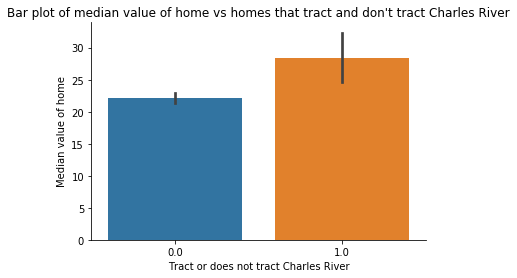

In [193]:
sns.barplot(x="CHAS",y="MedianPrice",data=boston)
plt.title("Bar plot of median value of home vs homes that tract and don't tract Charles River")
plt.xlabel("Tract or does not tract Charles River")
plt.ylabel("Median value of home")